## Dimensionality Reduction
#### Introduction to Machine Learning
: Think of machine learning as the **brains behind AI technologies**, and AI technologies do the actions. More technically, machine learning is the process of applying algorithmic analytical models to preprocessed data in iterations **to facilitate the discovery of hidden patterns or trends that are useful for making predictions.**
<br>
<font color=blue> i.e. sales forecasting, customer segment analysis, insurance claim fraud detection, and hedge fund classification.</font><br>

In [3]:
import pandas as pd
import numpy as np
import sklearn                                    # 'Sciki learns' = a machine learning library
from sklearn.decomposition import FactorAnalysis  # import the factor analysis model from the decomposition module of sklearn
from sklearn import datasets                      # allow to import all of the built in data sets for sklearn (including loading the Iris data set)

### 1. Factor Analysis on Iris Dataset

**Factor analysis** is a <u>regression method</u> you apply to discover root causes or hidden factors that are present in the data set but not observable. For example, imagine you're a marketing data scientist, and you must identify actionable customer segments for use in strategic marketing planning. You've got response data from a customer survey, you can apply factor analyis as a simple way to group respondents into meaningful customer segments based on similarities in how respondents answered a specific subset of survey questions. 

Use factor analysis to uncover latent variables from Scikit learns machine learning library built in data set called Iris. Remember, a latent variable is just a hidden variable that impacts how data is behaving.

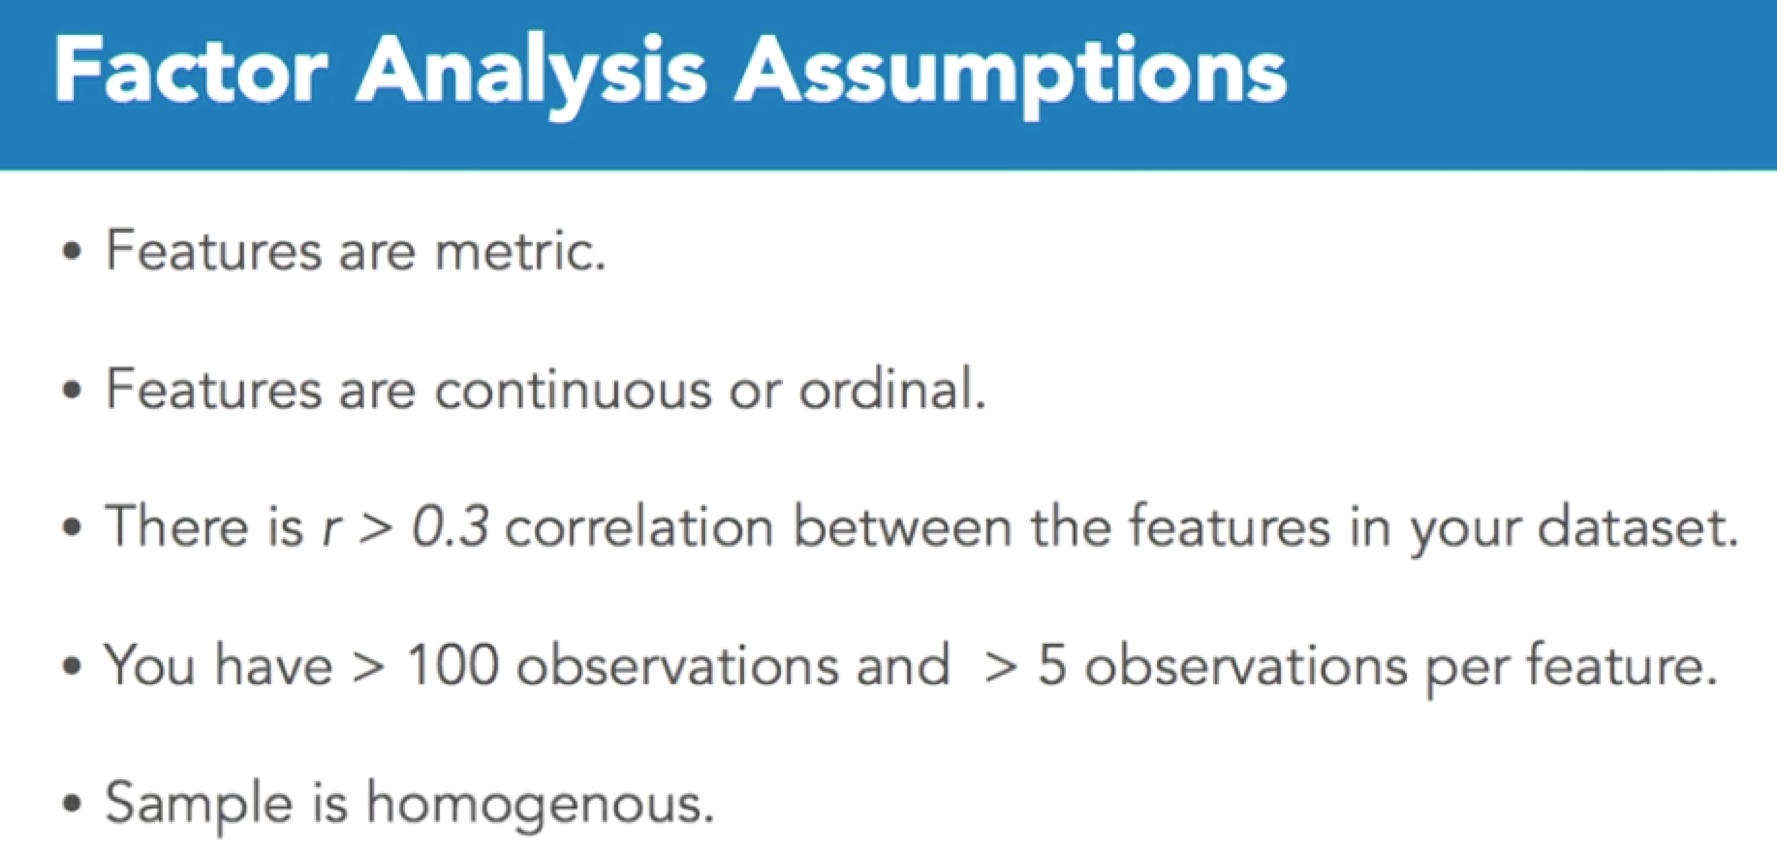

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

# To load a built in data set from Scikit learn, call the load_iris() function instead of as a variable we'll call this variable iris
iris = datasets.load_iris()
x = iris.data  # create 'x' variable and set it to iris.data

# create the following variable for putting column headers on our data frame table later in the demonstration and they're also included in the built in dataset.
# Attributes(predictive features): Sepal length, Sepal width, Petal length, Petal width
variable_names = iris.feature_names

# print out the 1st 10 rows with all columns
x[:10,]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

#### Using .fit() method to to instantiate a factor analysis object and find the latent variables

In [15]:
# factor = object
factor = FactorAnalysis().fit(x)

# make a data frame so that we can look at the latent variables, or the factors, that were found.
# To do this, we call the data frame constructor on the components attribute of our factor object. The components attribute represents the components, or in other words factors, with maximum variance.
# factor.components_: component attributes, columns = variable names
pd.DataFrame(factor.components_, columns = variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


### 2. Principal Component Analysis (PCA) 

**Principal component analysis** is an unsupervised machine learning algorithm that discovers relationships between variables and reduces variables down to a set of uncorrelated synthetic (종합적인) representations called principal components. 
For an example, imagine you work for a major grocery store chain and you've got some data that was generated by customers making purchases with their rewards card. The data set describes customers and the products they purchase.
You need to identify what key factors, perhaps like age or income, that most affect the customer's purchasing behavior. You can use PCA to decompose your customer purchasing data into one vector that describes the factors that influence the customers' purchasing behavior and another vector that describes the probabilities that products will be purchased based on those key influencing factors. Principal components are synthetic representations of a data set. 
Principal components contain all of the data set's important information but do not include the noise, information redundancy and outliers that were present in the original data set.

As far as what you can do with PCA, you can use PCA for <u>fraud detection, spam detection, image recognition, speech recognition, or also for outlier removal</u>, if you are using PCA for data pre-processing. You may be wondering how you can use factors and components.

In [21]:
import pandas as pd
import numpy as np

#  data visulation libraries
import matplotlib.pyplot as plt
import pylab as plt
from pylab import rcParams
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 8,6
sb.set_style('whitegrid')

### PCA on the Iris Dataset

In [22]:
# load our dataset
iris = datasets.load_iris()
x = iris.data
variable_names=iris.feature_names

#### Using .fit() method to to instantiate a PCA object 

In [23]:
#  pca: instantiate a PCA object
pca = decomposition.PCA()
# fit and transform
pca.fit_transform(x)


#  Explained variance ratio
pca.explained_variance_ratio_


array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [25]:
# Figure out how many components to keep
# Cumulative variance: use 'explained ratio variance' to calculate a cumulative variance
pca.explained_variance_ratio_.sum()

1.0

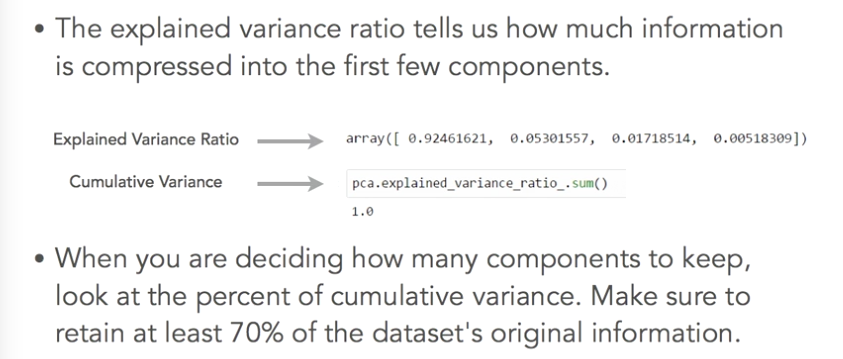

**Outcome:** Our cumulative variance means 100% of the data set's information is captured in the four components that were returned. That's great, **but we don't want 100% of the information back, remember? Some of that information is tied up with noise, information redundancy, or it represents outliers.** Our goal with PCA is to remove all that junk from the data, and keep only the fundamental or principal components that matter. Look at the explained variance ratio.

We see that the first component explains 92.4% of the data set's variation. That means it holds 92.4% of the data's information in one principal component. Pretty cool, right? And by taking the first two components (0.92461 and 0.05301), we only elude 2.3% (=100% - 97.7%)of the data set's information. That's the junk we want to get rid of anyway, so let's do that. We will take only the first two components and feel satisfied knowing that they contain <font color=blue>97.7% (= 0.92461+0.05301)</font> of the iris data set's original information. => Thus we decide to <font color=red>keep only those two components.</font> 

In [26]:
# make a data frame so we can look at our principal components
# pass arguments of the components attribute of our pca object and columns
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


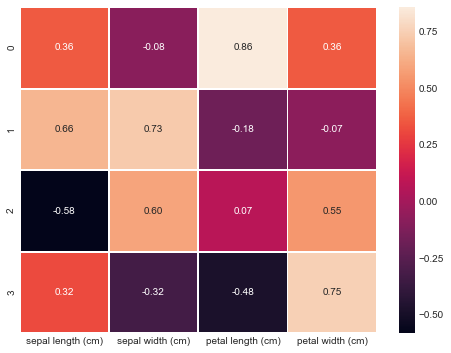

In [32]:
sb.heatmap(comps, annot=True, fmt=".2f", linewidths=.7)

**Outcome:** The results from this correlation heat map show that, one, principal component one is strongly positively correlated with <u>petal length</u> and moderately positively correlated with  <u>sepal length and petal width. </u> Component one is slightly negatively correlated with sepal width, and two, principal component number two is slightly negatively correlated with petal length and petal width, and moderately positively correlated with sepal length and sepal width.

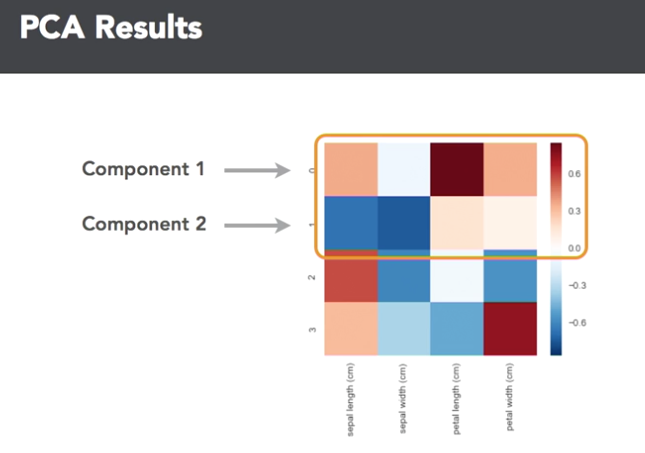
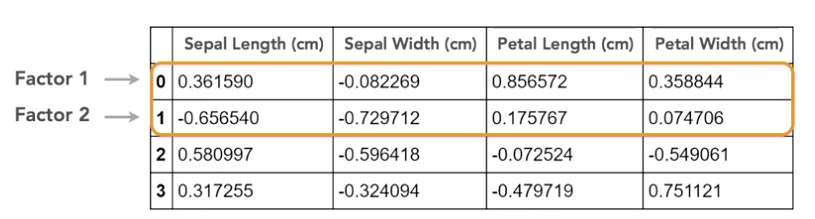

**Outcome:** The results (PCA results from screenshot above) from this correlation heat map show that, one, principal component one is strongly positively correlated with <u>petal length</u> and moderately positively correlated with  <u>sepal length and petal width. </u> Component one is slightly negatively correlated with sepal width, and two, principal component number two is strongly negatively correlated with sepal length and sepal width, and slightly negatively correlated with petal length and petal width.

You may be wondering how you can use these components once you've isolated. Well, you can **use them as input variables** for machine learning algorithms. So in the case of the iris data set, you <u>could use the two components we've generated as input for a logistic regression model</u> to predict species labels for new incoming data points. This will become more clear after you've learned how to do logistic regression. 